In [20]:
import pandas as pd
import scipy.stats as stats
df_pop = pd.read_csv('../../datasets/population.csv')
df_pop.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [7]:

# 데이터 타입 및 결측치 확인
print("\n데이터 타입과 결측치 확인:")
print(df_pop.info())


데이터 타입과 결측치 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [8]:

# 기술 통계량 확인 (수치형 데이터)
print("\n수치형 데이터의 기술 통계량:")
print(df_pop.describe())


수치형 데이터의 기술 통계량:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [10]:
# 결측치 비율 확인
print("\n결측치 비율 확인:")
print(df_pop.isnull().mean() * 100)


결측치 비율 확인:
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
gender            0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
income            0.000000
dtype: float64



각 컬럼의 기본 분포 (히스토그램):


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

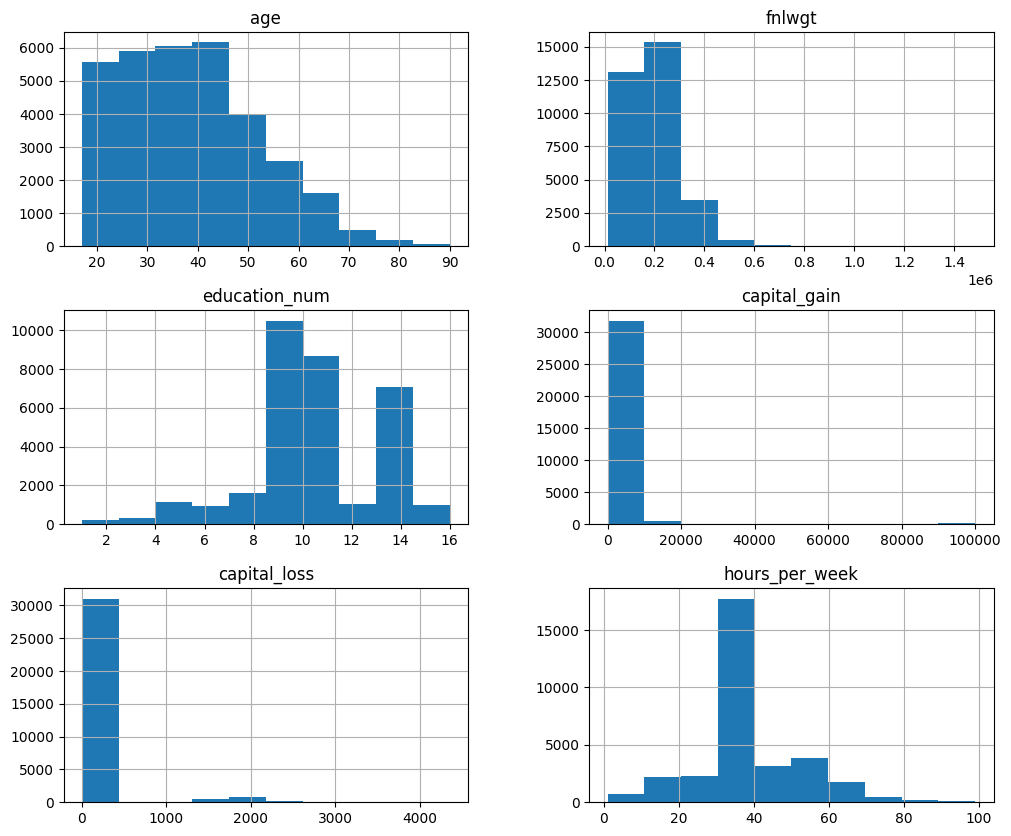

In [11]:
# 각 컬럼의 기본 분포 확인 (히스토그램)
print("\n각 컬럼의 기본 분포 (히스토그램):")
df_pop.hist(figsize=(12, 10))


In [12]:
# 'workclass', 'occupation', 'native_country'의 결측치를 최빈값으로 대체(최빈값은 극단적인 값의 영향을 받지 않기 때문에, 평균으로 대체하는 것보다 안정적)
for column in ['workclass', 'occupation', 'native_country']:
    most_frequent = df_pop[column].mode()[0]
    df_pop[column].fillna(most_frequent, inplace=True)

/tmp/ipykernel_39093/94613494.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pop[column].fillna(most_frequent, inplace=True)


In [13]:
# 결측치 처리 후 다시 확인
print("\n결측치 처리 후 비율:")
print(df_pop.isnull().mean() * 100)


결측치 처리 후 비율:
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64


In [18]:
df_pop[['workclass', 'income']].isna().sum()

workclass    0
income       0
dtype: int64

## 범주형 / 범주형

In [17]:
workclass_income = pd.crosstab(df_pop['workclass'], df_pop['income'])
workclass_income

income,<=50K,>50K
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,19378,5154
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


In [22]:
chi2, p, dof, expected = stats.chi2_contingency(workclass_income)


In [28]:

p #p-value

3.848177814824396e-195

- 두 변수(workclass와 income) 간에  독립적이지 않으며, 서로 관계가 있다

In [31]:
edu_country = pd.crosstab(df_pop['education_num'], df_pop['native_country'])
edu_country

native_country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
education_num,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,0,0,2,0,4,0,0,...,0,1,0,0,0,0,0,17,0,0
2,1,0,0,1,3,6,1,10,1,0,...,7,3,0,0,0,0,0,46,2,0
3,0,1,0,2,4,2,0,19,1,0,...,0,6,0,0,0,0,1,97,2,0
4,1,2,4,1,6,9,1,4,0,0,...,6,11,0,1,0,0,1,499,1,1
5,0,3,2,3,3,6,0,10,0,0,...,4,4,0,0,0,0,3,395,1,1
6,0,2,3,3,2,4,1,4,2,0,...,3,3,0,0,0,0,0,848,3,1
7,0,5,0,1,1,4,1,5,1,0,...,0,8,1,3,0,0,1,1067,3,0
8,1,2,0,2,3,5,1,2,1,0,...,1,2,0,0,0,1,1,365,1,0
9,7,31,18,20,24,18,10,21,28,6,...,10,39,5,23,3,6,6,9702,16,3


In [32]:
chi2, p, dof, expected = stats.chi2_contingency(edu_country)

In [33]:
p

0.0

- - 두 변수(education_num와 native_country) 간에  독립적이지 않으며, 서로 관계가 있다